<a href="https://colab.research.google.com/github/hbskay3110/bt/blob/main/Lab_8_20130298_NguyenTrungKien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **GridSearchCV** for tuning the hyper-parameters of an estimator and applying vectorization techniques to the **movie reviews dataset** for classification task. 

*   **Deadline: 23:59, 17/4/2023**



# Import libraries

In [11]:
# code
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from prettytable import PrettyTable
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

#Task 1. With **iris** dataset
*  1.1. Apply **GridSearchCV** for **SVM** to find the best hyperparameters using the following param_grid.

```
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
```




In [ ]:
data = datasets.load_iris();
X = data.data
y = data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
#code
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
svm_class = svm.SVC()
grid_svm_class = GridSearchCV(estimator= svm_class,
                              param_grid = param_grid,
                              scoring = 'accuracy',
                              n_jobs = 5,
                              cv =10,
                              refit = True,
                              return_train_score= True)


In [ ]:
grid_svm_class.fit(X_train,y_train);
y_pred  = grid_svm_class.predict(X_test)
smvAccs = metrics.accuracy_score(y_test, y_pred);
smvPrecss = metrics.precision_score(y_test, y_pred,average='macro');
smvRecalls = metrics.recall_score(y_test, y_pred,average='macro');
smvF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(grid_svm_class.best_params_)
print(smvAccs,smvPrecss,smvRecalls,smvF1s)
SVM =['SVM', round(smvAccs, 2), round(smvPrecss, 2), round(smvRecalls, 2), round(smvF1s, 2)]

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
1.0 1.0 1.0 1.0


*  1.2. Apply **GridSearchCV** for **kNN** to find the best hyperparameters using the following param_grid.

```
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
```
where

    *  **n_neighbors**: Decide the best k based on the values we have computed earlier.
    *  **weights**: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
    *  **metric**: The distance metric to be used will calculating the similarity.


In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier();
grid_knn_class = GridSearchCV(estimator= knn,
                              param_grid = grid_params,
                              scoring = 'accuracy',
                              n_jobs = 5,
                              cv =10,
                              refit = True,
                              return_train_score= True)



In [ ]:
grid_knn_class.fit(X_train,y_train);
y_pred  = grid_knn_class.predict(X_test)
knnAccs = metrics.accuracy_score(y_test, y_pred);
knnPrecss = metrics.precision_score(y_test, y_pred,average='macro');
knnRecalls = metrics.recall_score(y_test, y_pred,average='macro');
knnF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(grid_knn_class.best_params_)
print(knnAccs,knnPrecss,knnRecalls,knnF1s)


{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}
0.9555555555555556 0.9558404558404558 0.9558404558404558 0.9558404558404558


In [ ]:
#code
KNN =['KNN', round(knnAccs, 2), round(knnPrecss, 2), round(knnRecalls, 2), round(knnF1s, 2)]

*  1.3. Apply **GridSearchCV** for **Random Forest** to find the best hyperparameters using the following param_grid.

```
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
```

In [ ]:
#code
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
rf = RandomForestClassifier();
grid_rf_class = GridSearchCV(estimator= rf,
                              param_grid = param_grid,
                              scoring = 'accuracy',
                              n_jobs = 5,
                              cv =10,
                              refit = True,
                              return_train_score= True)


In [ ]:
grid_rf_class.fit(X_train,y_train);
y_pred  = grid_rf_class.predict(X_test)
rfAccs = metrics.accuracy_score(y_test, y_pred);
rfPrecss = metrics.precision_score(y_test, y_pred,average='macro');
rfRecalls = metrics.recall_score(y_test, y_pred,average='macro');
rfF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(grid_rf_class.best_params_)
print(rfAccs,rfPrecss,rfRecalls,rfF1s)

{'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 25}
0.9555555555555556 0.9558404558404558 0.9558404558404558 0.9558404558404558


In [ ]:
RF =['RF', round(rfAccs, 2), round(rfAccs, 2), round(rfRecalls, 2), round(rfF1s, 2)]

In [ ]:
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])

t.add_row(RF)
t.add_row(KNN)
t.add_row(SVM)
print(t)

+----------------+----------+-----------+--------+------+
| Classification | Accuracy | Precision | Recall |  F1  |
+----------------+----------+-----------+--------+------+
|       RF       |   0.96   |    0.96   |  0.96  | 0.96 |
|      KNN       |   0.96   |    0.96   |  0.96  | 0.96 |
|      SVM       |   1.0    |    1.0    |  1.0   | 1.0  |
+----------------+----------+-----------+--------+------+


*   1.4 Compare the best obtained results from 1.1 to 1.3 (use PrettyTable to dispaly the results)

#Task 2. 
For breast cancer dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   Apply **GridSearchCV** to different classification algorithms such as **SVM, kNN, LogisticRegression, RandomForest**.
*   Compare the results obtained by the best hyperparameters among classification algorithms.

In [ ]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,train_size=0.3,random_state=1)



*   2.1. Apply **GridSearchCV** to **SVM** 


In [ ]:
# code
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
svm_class = svm.SVC()
grid_svm_class = GridSearchCV(estimator= svm_class,
                              param_grid = param_grid,
                              scoring = 'accuracy',
                              n_jobs = 5,
                              cv =10,
                              refit = True,
                              return_train_score= True)

In [ ]:
grid_svm_class.fit(X_train,y_train);
y_pred  = grid_svm_class.predict(X_test)
smvAccs = metrics.accuracy_score(y_test, y_pred);
smvPrecss = metrics.precision_score(y_test, y_pred,average='macro');
smvRecalls = metrics.recall_score(y_test, y_pred,average='macro');
smvF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(grid_svm_class.best_params_)
print(smvAccs,smvPrecss,smvRecalls,smvF1s)
SVM =['SVM', round(smvAccs, 2), round(smvPrecss, 2), round(smvRecalls, 2), round(smvF1s, 2)]

{'C': 100, 'gamma': 1, 'kernel': 'linear'}
0.9649122807017544 0.9635549872122762 0.9635549872122762 0.9635549872122762


*   2.2. Apply **GridSearchCV** to **kNN** 

In [ ]:
#code
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier();
grid_knn_class = GridSearchCV(estimator= knn,
                              param_grid = grid_params,
                              scoring = 'accuracy',
                              n_jobs = 5,
                              cv =10,
                              refit = True,
                              return_train_score= True)


In [ ]:
grid_knn_class.fit(X_train,y_train);
y_pred  = grid_knn_class.predict(X_test)
knnAccs = metrics.accuracy_score(y_test, y_pred);
knnPrecss = metrics.precision_score(y_test, y_pred,average='macro');
knnRecalls = metrics.recall_score(y_test, y_pred,average='macro');
knnF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(grid_knn_class.best_params_)
print(knnAccs,knnPrecss,knnRecalls,knnF1s)

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
0.8771929824561403 0.9146341463414633 0.8478260869565217 0.8635897435897436


In [ ]:
KNN =['KNN', round(knnAccs, 2), round(knnPrecss, 2), round(knnRecalls, 2), round(knnF1s, 2)]

*   2.3. Apply **GridSearchCV** to **LogisticRegression** 

In [ ]:
#code
grid_params = { 'penalty' :['l1', 'l2', 'elasticnet'],
               'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
               'multi_class': ['auto', 'ovr', 'multinomial']}
lr = LogisticRegression();
grid_lr_class = GridSearchCV(estimator= lr,
                              param_grid = grid_params,
                              scoring = 'accuracy',
                              n_jobs = 5,
                              cv =10,
                              refit = True,
                              return_train_score= True)




In [ ]:
grid_lr_class.fit(X_train,y_train);
y_pred  = grid_lr_class.predict(X_test)
lrAccs = metrics.accuracy_score(y_test, y_pred);
lrPrecss = metrics.precision_score(y_test, y_pred,average='macro');
lrRecalls = metrics.recall_score(y_test, y_pred,average='macro');
lrF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(grid_lr_class.best_params_)
print(lrAccs,lrPrecss,lrRecalls,lrF1s)
lr = ['LR', round(lrAccs, 2), round(lrPrecss, 2), round(lrRecalls, 2), round(lrF1s, 2)]


{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
0.9824561403508771 0.9857142857142858 0.9782608695652174 0.9816425120772947


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

*   2.4. Apply **GridSearchCV** to **RandomForest** 

In [ ]:
#code
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
rf = RandomForestClassifier();
grid_rf_class = GridSearchCV(estimator= rf,
                              param_grid = param_grid,
                              scoring = 'accuracy',
                              n_jobs = 5,
                              cv =10,
                              refit = True,
                              return_train_score= True)


In [ ]:
grid_rf_class.fit(X_train,y_train);
y_pred  = grid_rf_class.predict(X_test)
rfAccs = metrics.accuracy_score(y_test, y_pred);
rfPrecss = metrics.precision_score(y_test, y_pred,average='macro');
rfRecalls = metrics.recall_score(y_test, y_pred,average='macro');
rfF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(grid_rf_class.best_params_)
print(rfAccs,rfPrecss,rfRecalls,rfF1s)
RF =['RF', round(rfAccs, 2), round(rfAccs, 2), round(rfRecalls, 2), round(rfF1s, 2)]

{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}
0.9298245614035088 0.924375 0.9341432225063939 0.928030303030303


*   2.5. Compare the best obtained results among classification algorithms (use PrettyTable to dispaly the results) 

In [ ]:
#code
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_row(RF)
t.add_row(KNN)
t.add_row(lr)
t.add_row(SVM)
print(t)

+----------------+----------+-----------+--------+------+
| Classification | Accuracy | Precision | Recall |  F1  |
+----------------+----------+-----------+--------+------+
|       RF       |   0.93   |    0.93   |  0.93  | 0.93 |
|      KNN       |   0.88   |    0.91   |  0.85  | 0.86 |
|       LR       |   0.98   |    0.99   |  0.98  | 0.98 |
|      SVM       |   0.96   |    0.96   |  0.96  | 0.96 |
+----------------+----------+-----------+--------+------+


#Task 3. 
The dataset consists of **2000 user-created movie reviews** archived on the IMDb(Internet Movie Database). The reviews are equally partitioned into a positive set and a negative set (1000+1000). Each review consists of a plain text file (.txt) and a class label representing the overall user opinion. 
The class attribute has only two values: **pos** (positive) or **neg** (negative).


*   3.1 Importing additional libraries

In [1]:
import nltk, random
nltk.download('movie_reviews')#download movie reviews dataset
from nltk.corpus import movie_reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


*   3.2. Movie reviews information

In [2]:
#code
print(len(movie_reviews.fileids()))
print(movie_reviews.categories())
print(movie_reviews.words()[:100])
print(movie_reviews.fileids()[:10])

2000
['neg', 'pos']
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


*   3.3. Create dataset from movie reviews

In [3]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.seed(123)
random.shuffle(documents)

In [4]:
print('Number of Reviews/Documents: {}'.format(len(documents)))
print('Corpus Size (words): {}'.format(np.sum([len(d) for (d,l) in documents])))
print('Sample Text of Doc 1:')
print('-'*30)
print(' '.join(documents[0][0][:50])) # first 50 words of the first document

Number of Reviews/Documents: 2000
Corpus Size (words): 1583820
Sample Text of Doc 1:
------------------------------
most movies seem to release a third movie just so it can be called a trilogy . rocky iii seems to kind of fit in that category , but manages to be slightly unique . the rocky formula of " rocky loses fight / rocky trains / rocky wins fight


In [5]:
sentiment_distr = Counter([label for (words, label) in documents])
print(sentiment_distr)

Counter({'pos': 1000, 'neg': 1000})


*   3.4. Train test split

In [6]:
train, test = train_test_split(documents, test_size = 0.33, random_state=42)

In [7]:
## Sentiment Distrubtion for Train and Test
print(Counter([label for (words, label) in train]))
print(Counter([label for (words, label) in test]))

Counter({'neg': 674, 'pos': 666})
Counter({'pos': 334, 'neg': 326})


In [8]:
X_train = [' '.join(words) for (words, label) in train]
X_test = [' '.join(words) for (words, label) in test]
y_train = [label for (words, label) in train]
y_test = [label for (words, label) in test]
y_test

['pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',


*   3.5. Text Vectorization

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vec = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
X_train_bow = tfidf_vec.fit_transform(X_train) # fit train
X_test_bow = tfidf_vec.transform(X_test) # transform test


*   3.6. Apply **SVM** with **GridSearchCV** 

In [16]:
def score_metrix_GridSearchCV(clf, param_gird, score=None, average='binary', x_train=None, x_test=None, y_train=None, y_test=None,pos_label=1):
  grid_class = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=2,scoring='accuracy',refit = True, return_train_score=True,cv=10)
  grid_class.fit(x_train, y_train)
  y_predict = grid_class.predict(x_test)
  ac = metrics.accuracy_score(y_test, y_predict)
  ps = metrics.precision_score(y_test, y_predict,average=average,pos_label=pos_label)
  rs = metrics.recall_score(y_test, y_predict,average=average,pos_label=pos_label)
  fs = metrics.f1_score(y_test, y_predict,average=average,pos_label=pos_label)
  print('Best_param:',grid_class.best_params_)
  print('Predict:',y_predict)
  print('Accuracy', ac)
  print('Precision', ps)
  print('Recall', rs)
  print('F1', fs)
  print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
  score.append(ac)
  score.append(ps)
  score.append(rs)
  score.append(fs)
  return score

Best_param: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Predict: ['pos' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos'
 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg'
 'neg' 'neg' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'pos' 'pos'
 'pos' 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'pos'
 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg'
 'neg' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'pos'
 'pos' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'pos' 'pos'
 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg'
 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg'
 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos' 'pos' 'neg' 'pos' 'neg'
 'pos' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'neg'
 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'neg'
 'pos' 'pos' 'pos' 'neg' 'pos' 'pos' 'neg' 'pos' 'neg' 'pos' '

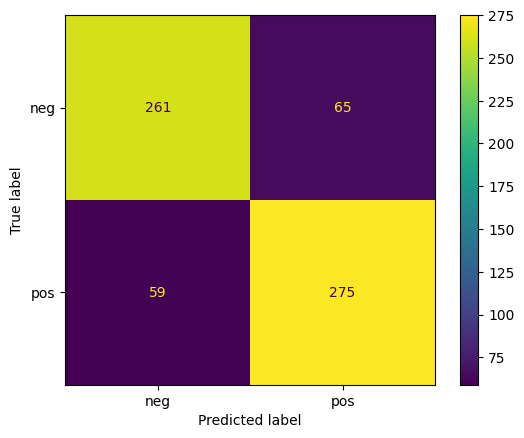

In [17]:
#code
param_grid = {'C': [1, 10],
              'gamma': [1, 0.1],
              'kernel': ['rbf','linear']}
svm_class = svm.SVC()
svm = score_metrix_GridSearchCV(svm_class, param_grid, score=["SVM"], x_train=X_train_bow, x_test=X_test_bow, y_train=y_train, y_test=y_test,pos_label='pos')



*   3.7. Apply **RandomForest** with **GridSearchCV** 

Best_param: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 150}
Predict: ['pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg'
 'neg' 'pos' 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg'
 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos' 'pos'
 'pos' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos' 'neg'
 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'pos'
 'neg' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos'
 'pos' 'neg' 'pos' 'pos' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos'
 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg'
 'neg' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos'
 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'neg' 'pos' 'pos' 'neg' 'pos' 'neg'
 'pos' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'pos'
 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg'
 'pos' 'pos' 'pos' '

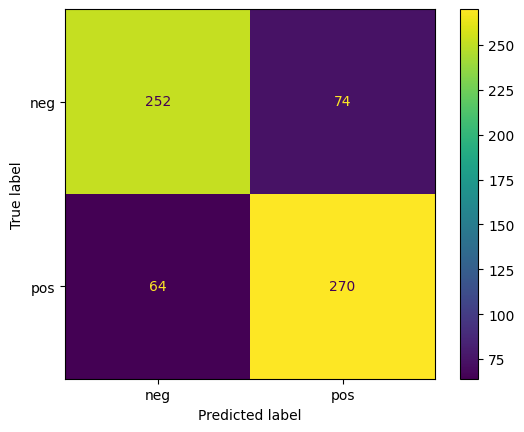

In [18]:
#code
param_grid = {
    'n_estimators': [25, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [6, 9],
    'max_leaf_nodes': [3, 6],
}
clf = RandomForestClassifier()
rf = score_metrix_GridSearchCV(clf, param_grid, score=["RandomForest"], x_train=X_train_bow, x_test=X_test_bow, y_train=y_train, y_test=y_test,pos_label='pos')

*   3.8. Apply **kNN** with **GridSearchCV** 

In [ ]:
#code
param_grid = { 'n_neighbors' : [5,7,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean']}
clf = KNeighborsClassifier()
knn = score_metrix_GridSearchCV(clf, param_grid, score=["KNN"], x_train=X_train_bow, x_test=X_test_bow, y_train=y_train, y_test=y_test,pos_label='pos')

*   3.9. Apply **LogisticRegression** with **GridSearchCV** 

Best_param: {'C': 1, 'solver': 'liblinear'}
Predict: ['pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg'
 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'pos' 'neg' 'neg'
 'neg' 'neg' 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg' 'pos' 'pos'
 'pos' 'pos' 'neg' 'pos' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'pos'
 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg' 'pos' 'pos' 'neg' 'neg'
 'neg' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos'
 'pos' 'neg' 'pos' 'pos' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'pos'
 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'neg'
 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg'
 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'pos' 'pos' 'neg' 'pos' 'neg'
 'pos' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'neg'
 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg'
 'pos' 'pos' 'pos' 'neg' 'pos' 'pos' 'neg' 'pos' 'neg' 'pos' 'pos' 'neg

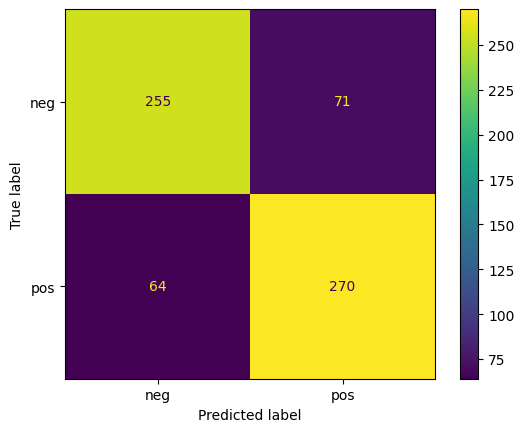

In [20]:
#code
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C':[0.001, 0.01, 0.1, 1]}
clf = LogisticRegression()
logis = score_metrix_GridSearchCV(clf, param_grid, score=["LogisticRegression"], x_train=X_train_bow, x_test=X_test_bow, y_train=y_train, y_test=y_test,pos_label='pos')

*   3.10. Compare the best obtained results among classification algorithms (use PrettyTable to dispaly the results) 

In [ ]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'C':[0.001, 0.01, 0.1, 1]}
table = PrettyTable(['Classification','Accuracy','Precision','Recall','F1'])
for r in param_grid:
  table.add_row(r)
print(table)

#Finally,
Save a copy in your Github. Remember renaming the notebook.